In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import keras.backend as K
import shap

In [4]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\All\\'
os.chdir(base_dir)

In [5]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')

y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [6]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (34654, 15)


In [7]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [8]:
# Model architecture for MLP with 1 hidden layer and L1 Regularization
model = Sequential([
    Dense(50, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1(0.01)),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                800       
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 851 (3.32 KB)
Trainable params: 851 (3.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 2s 2ms/step - loss: 141738.7656 - mse: 141732.7500 - rmse: 364.6382 - mae: 241.4478 - mape: 3497327616.0000 - val_loss: 109713.8047 - val_mse: 109706.3125 - val_rmse: 324.7168 - val_mae: 218.6339 - val_mape: 2846569216.0000
Epoch 2/100
1083/1083 [==============================] - 2s 1ms/step - loss: 110764.4766 - mse: 110756.4453 - rmse: 327.6602 - mae: 218.0431 - mape: 3074952960.0000 - val_loss: 105183.7266 - val_mse: 105175.2188 - val_rmse: 317.9094 - val_mae: 213.1121 - val_mape: 2879481600.0000
Epoch 3/100
1083/1083 [==============================] - 2s 1ms/step - loss: 106988.2188 - mse: 106979.3125 - rmse: 321.4768 - mae: 214.5380 - mape: 3031015424.0000 - val_loss: 102013.1250 - val_mse: 102003.9531 - val_rmse: 312.8660 - val_mae: 209.0721 - val_mape: 2780553728.0000
Epoch 4/100
1083/1083 [==============================] - 2s 1ms/step - loss: 104642.3984 - mse: 104633.0469 - rmse: 317.9319 - mae: 211.8529 - mape: 30492618

1083/1083 [==============================] - 2s 2ms/step - loss: 83341.4141 - mse: 83325.4062 - rmse: 282.1973 - mae: 174.3582 - mape: 2224763904.0000 - val_loss: 75907.6641 - val_mse: 75891.6094 - val_rmse: 267.2642 - val_mae: 166.4482 - val_mape: 2129332480.0000
Epoch 60/100
1083/1083 [==============================] - 2s 1ms/step - loss: 82606.2188 - mse: 82590.1094 - rmse: 281.1581 - mae: 174.0695 - mape: 2206628608.0000 - val_loss: 75412.4688 - val_mse: 75396.3750 - val_rmse: 266.4718 - val_mae: 164.8216 - val_mape: 1878412160.0000
Epoch 61/100
1083/1083 [==============================] - 2s 1ms/step - loss: 82686.6094 - mse: 82670.4531 - rmse: 280.4449 - mae: 173.8296 - mape: 2202097408.0000 - val_loss: 75182.4062 - val_mse: 75166.2266 - val_rmse: 266.3250 - val_mae: 166.3665 - val_mape: 2047064320.0000
Epoch 62/100
1083/1083 [==============================] - 2s 1ms/step - loss: 82656.6641 - mse: 82640.4609 - rmse: 280.9633 - mae: 173.5652 - mape: 2282747648.0000 - val_loss: 751

In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 1ms/step - loss: 70699.3672 - mse: 70682.2891 - rmse: 258.5767 - mae: 159.2056 - mape: 1953524224.0000
Test Loss: [70699.3671875, 70682.2890625, 258.57672119140625, 159.20562744140625, 1953524224.0]


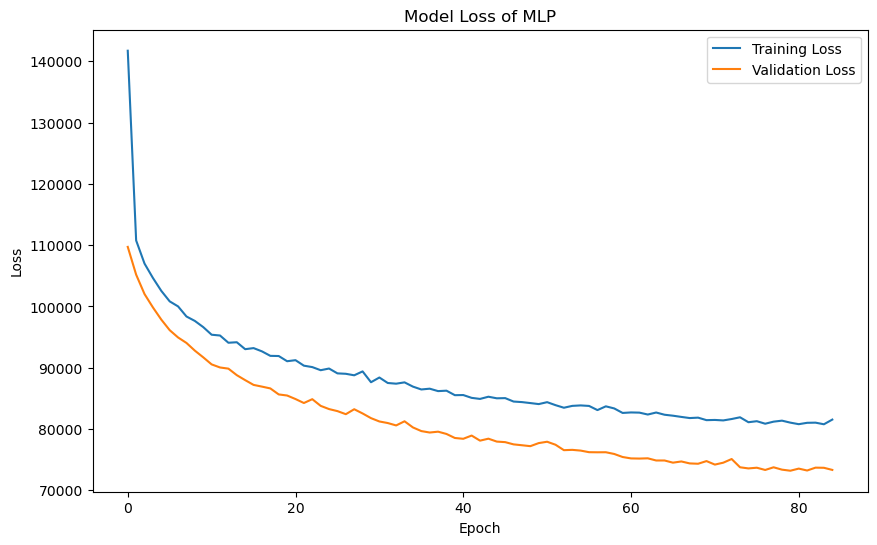

In [24]:
# Assuming history is the output of the model.fit() method
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of MLP')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 0s 873us/step


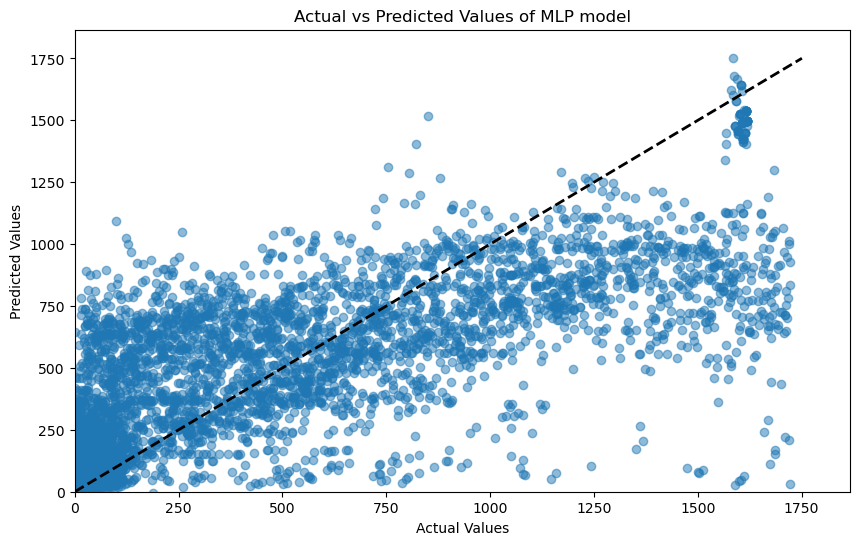

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values of MLP model')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

# Set the limits for x and y axis to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()

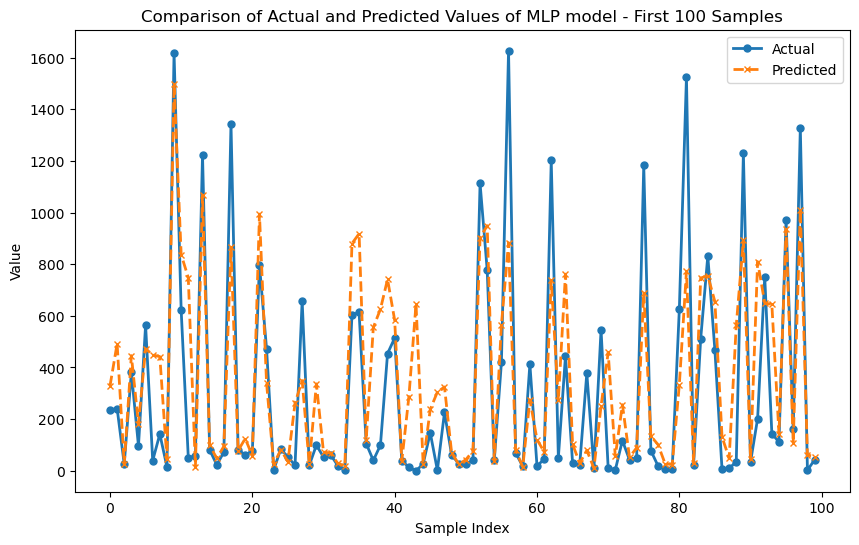

In [17]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values of MLP model - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

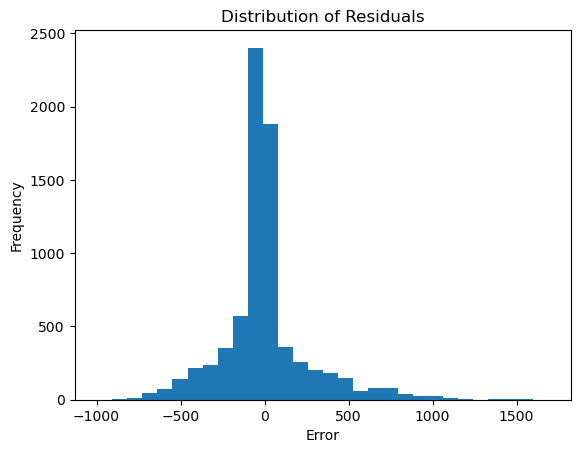

In [18]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 1ms/step - loss: 70699.3672 - mse: 70682.2891 - rmse: 258.5767 - mae: 159.2056 - mape: 1953524224.0000
Test loss (MSE): 70699.3671875
Mean Squared Error (MSE): 70682.2890625
Root Mean Squared Error (RMSE): 258.57672119140625
Mean Absolute Error (MAE): 159.20562744140625
Mean Absolute Percentage Error (MAPE): 1953524224.0


In [20]:
# Create SHAP explainer
explainer = shap.DeepExplainer(model, X_train)

C:\Users\firoj\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
C:\Users\firoj\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")


In [21]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


C:\Users\firoj\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:624: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


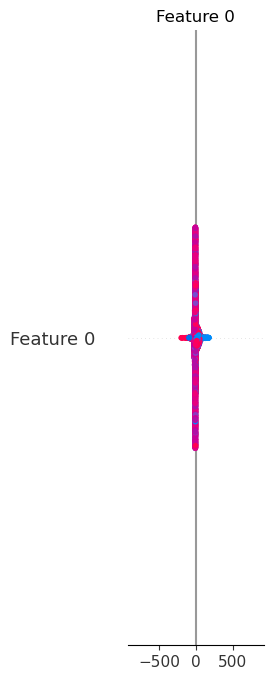

In [22]:
# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

In [23]:
# Visualize the impact of individual features
# For example, to plot the impact of the first feature
shap.dependence_plot(0, shap_values[0], X_test)

IndexError: index 15 is out of bounds for axis 0 with size 15

In [ ]:
# Check the shape of X_test to get the number of features
print("X_test shape:", X_test.shape)

In [ ]:
# Visualize the impact of individual features
# Ensure the feature index is within the range of the number of features
num_features = X_test.shape[1]
for i in range(num_features):
    shap.dependence_plot(i, shap_values[0], X_test)

In [ ]:
print("SHAP values shape:", np.array(shap_values).shape)

In [ ]:
# Check the shape of X_test to get the number of features
num_features = X_test.shape[1]

# Visualize the impact of individual features
# Ensure the feature index is within the range of the number of features
for i in range(num_features):
    shap.dependence_plot(i, shap_values[0], X_test)